In [41]:
library(survival)
library(ggplot2)
library(survminer)
library(survMisc)
library(tidyverse)

## Get the data scraped through Python

### TCGA base

In [42]:
df = read.csv("data_base_partial", header=TRUE) #expression data for the whole TCGA database

In [43]:
head(df)

X expressionTSPAN6 expressionTNMD expressionDPM1 expressionSCYL3
1 0 15,64             8,795         19,08          15,82          
2 1 15,67             9,455         19,70          17,87          
3 2 18,12            14,960         20,00          16,03          
4 3 18,12            10,070         18,93          16,62          
5 4 17,97            12,040         19,04          16,30          
6 5 18,59            10,910         18,85          16,19          
  expressionC1orf112 expressionFGR expressionCFH expressionFUCA2 expressionGCLC
1 14,50              14,65         15,29         17,68           16,27         
2 15,66              15,95         16,90         18,64           16,93         
3 15,49              16,69         16,85         18,37           16,48         
4 15,23              15,55         17,12         18,31           16,40         
5 14,94              15,50         17,43         18,57           16,49         
6 14,90              16,00         17,01         18,32           16,05         
  ⋯ expressionMSL3 expressionCREBBP expressionMPO expressionPON1
1 ⋯ 15,86          17,97             6,675         6,988        
2 ⋯ 17,08          17,25            10,320        13,870        
3 ⋯ 16,38          16,87             0,000         9,447        
4 ⋯ 16,40          17,21             9,266         8,263        
5 ⋯ 16,59          17,60            10,170         8,322        
6 ⋯ 16,75          17,30             9,048        10,360        
  expressionGCFC2 expressionWDR54 expressionCROT expressionABCB4 survival event
1 16,19           15,96           15,81          11,72           4047     0    
2 16,63           17,67           16,03          12,85           4005     0    
3 16,42           17,19           17,82          12,13           1474     0    
4 16,45           16,39           18,03          11,74           1448     0    
5 16,16           16,21           16,95          12,94            348     0    
6 15,99           17,28           18,46          12,83           1477     0

### Plot the data

In [44]:
fit <- survfit(Surv(survival, event) ~ 1,  type="kaplan-meier", conf.type="log", data=df)

Warning message in .pvalue(fit, data = data, method = method, pval = pval, pval.coord = pval.coord, :
“There are no survival curves to be compared. 
 This is a null model.”

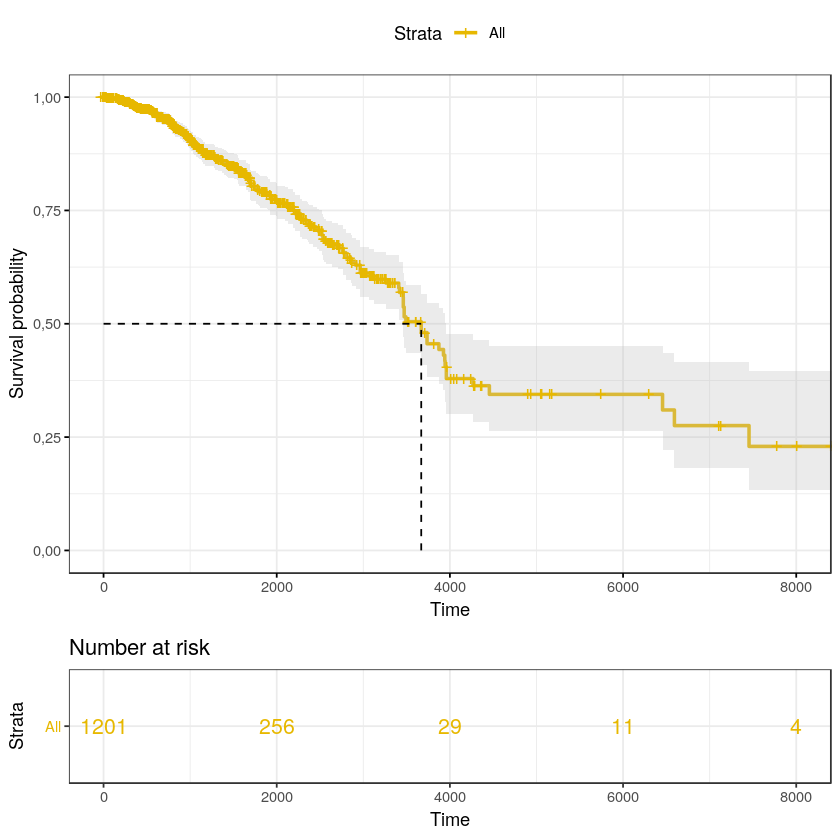

In [45]:
# Change color, linetype by strata, risk.table color by strata
ggsurvplot(fit,
          pval = TRUE, conf.int = TRUE,
          risk.table = TRUE, # Add risk table
          risk.table.col = "strata", # Change risk table color by groups
          linetype = "strata", # Change line type by groups
          surv.median.line = "hv", # Specify median survival
          ggtheme = theme_bw(), # Change ggplot2 theme
          palette = c("#E7B800", "#2E9FDF"))

## Cox regression

In [57]:
for( col in names(df)){
    df[,col]
        if(col != "survival" && col != "event" && col != "X"){
            res.cox1 <- coxph(Surv(survival, event) ~ df[,col], data = df)
            if(i == 1){
                write.table(summary(res.cox1)$coef, file = "data_partial_for_report2")
            }
            else{
                write.table(summary(res.cox1)$coef, file = "data_partial_for_report2", append = TRUE)
            }
        }
}

Warning message in write.table(summary(res.cox1)$coef, file = "data_partial_for_report2", :
“appending column names to file”Warning message in write.table(summary(res.cox1)$coef, file = "data_partial_for_report2", :
“appending column names to file”Warning message in write.table(summary(res.cox1)$coef, file = "data_partial_for_report2", :
“appending column names to file”Warning message in write.table(summary(res.cox1)$coef, file = "data_partial_for_report2", :
“appending column names to file”Warning message in write.table(summary(res.cox1)$coef, file = "data_partial_for_report2", :
“appending column names to file”Warning message in write.table(summary(res.cox1)$coef, file = "data_partial_for_report2", :
“appending column names to file”Warning message in write.table(summary(res.cox1)$coef, file = "data_partial_for_report2", :
“appending column names to file”Warning message in write.table(summary(res.cox1)$coef, file = "data_partial_for_report2", :
“appending column names to file”Warning 

“appending column names to file”Warning message in write.table(summary(res.cox1)$coef, file = "data_partial_for_report2", :
“appending column names to file”Warning message in write.table(summary(res.cox1)$coef, file = "data_partial_for_report2", :
“appending column names to file”Warning message in write.table(summary(res.cox1)$coef, file = "data_partial_for_report2", :
“appending column names to file”Warning message in write.table(summary(res.cox1)$coef, file = "data_partial_for_report2", :
“appending column names to file”Warning message in write.table(summary(res.cox1)$coef, file = "data_partial_for_report2", :
“appending column names to file”Warning message in write.table(summary(res.cox1)$coef, file = "data_partial_for_report2", :
“appending column names to file”Warning message in write.table(summary(res.cox1)$coef, file = "data_partial_for_report2", :
“appending column names to file”Warning message in write.table(summary(res.cox1)$coef, file = "data_partial_for_report2", :
“appendi

In [13]:
#res.cox1 <- coxph(Surv(survival, event) ~ expressionNCKAP1 + expressionCYFIP2 + expressionNCKAP1L + expressionWASF2 + expressionABI3 + expressionWASF3 + expressionABI1 + expressionABI2 + expressionCYFIP1 + expressionWASF1 + expressionBRK1, data =  df)

In [14]:
#res.cox2 <- coxph(Surv(survival, event) ~ expressionNCKAP1 + expressionARPIN + strata(expressionPICK1) + expressionWASF1 + expressionCYFIP1 + expressionABI1 + expressionBRK1, data =  df)

In [15]:
#summary(res.cox1)

Call:
coxph(formula = Surv(survival, event) ~ expressionNCKAP1 + expressionCYFIP2 + 
    expressionNCKAP1L + expressionWASF2 + expressionABI3 + expressionWASF3 + 
    expressionABI1 + expressionABI2 + expressionCYFIP1 + expressionWASF1 + 
    expressionBRK1, data = df)

  n= 1203, number of events= 200 

                      coef exp(coef) se(coef)      z Pr(>|z|)  
expressionNCKAP1   0.44001   1.55273  0.19850  2.217   0.0266 *
expressionCYFIP2  -0.08283   0.92051  0.06561 -1.262   0.2068  
expressionNCKAP1L -0.09089   0.91312  0.10714 -0.848   0.3963  
expressionWASF2    0.07568   1.07861  0.13839  0.547   0.5845  
expressionABI3     0.08726   1.09118  0.15198  0.574   0.5659  
expressionWASF3    0.04799   1.04916  0.05947  0.807   0.4197  
expressionABI1    -0.09773   0.90689  0.17520 -0.558   0.5770  
expressionABI2    -0.22464   0.79880  0.16110 -1.394   0.1632  
expressionCYFIP1   0.25904   1.29568  0.19608  1.321   0.1865  
expressionWASF1    0.07887   1.08206  0.06937  1.137  

In [16]:
#summary(res.cox1)$coef

coef        exp(coef) se(coef)   z          Pr(>|z|)  
expressionNCKAP1   0.44001491 1.5527304 0.19849859  2.2167155 0.02664254
expressionCYFIP2  -0.08282589 0.9205114 0.06560595 -1.2624753 0.20677782
expressionNCKAP1L -0.09088632 0.9131215 0.10713513 -0.8483336 0.39625222
expressionWASF2    0.07567565 1.0786127 0.13838644  0.5468430 0.58448661
expressionABI3     0.08726363 1.0911843 0.15198144  0.5741729 0.56585077
expressionWASF3    0.04799246 1.0491627 0.05947077  0.8069925 0.41967082
expressionABI1    -0.09772989 0.9068938 0.17520212 -0.5578122 0.57697261
expressionABI2    -0.22464110 0.7988029 0.16109646 -1.3944508 0.16318150
expressionCYFIP1   0.25903589 1.2956803 0.19607846  1.3210829 0.18647374
expressionWASF1    0.07886652 1.0820599 0.06937440  1.1368245 0.25561168
expressionBRK1     0.12502719 1.1331793 0.15871690  0.7877371 0.43085048

In [20]:
write.csv(summary(res.cox1)$coef, "data_partial_for_report")

#### Test the assumptions of the cox regression

In [122]:
#test.ph <- cox.zph(res.cox1)
#test.ph    # a low p value indicate a deviation from the proportional hazard hypothesis

                       rho    chisq      p
expressionNCKAP1   0.05341 5.46e-01 0.4598
expressionCYFIP2   0.13622 4.34e+00 0.0373
expressionNCKAP1L  0.00141 3.87e-04 0.9843
expressionWASF2    0.02677 1.30e-01 0.7184
expressionABI3     0.00439 4.47e-03 0.9467
expressionWASF3    0.11802 3.28e+00 0.0703
expressionABI1    -0.08415 1.17e+00 0.2802
expressionABI2     0.06656 8.48e-01 0.3572
expressionCYFIP1  -0.05955 8.78e-01 0.3487
expressionWASF1   -0.06300 8.80e-01 0.3482
expressionBRK1    -0.04879 4.70e-01 0.4932
GLOBAL                  NA 1.45e+01 0.2059

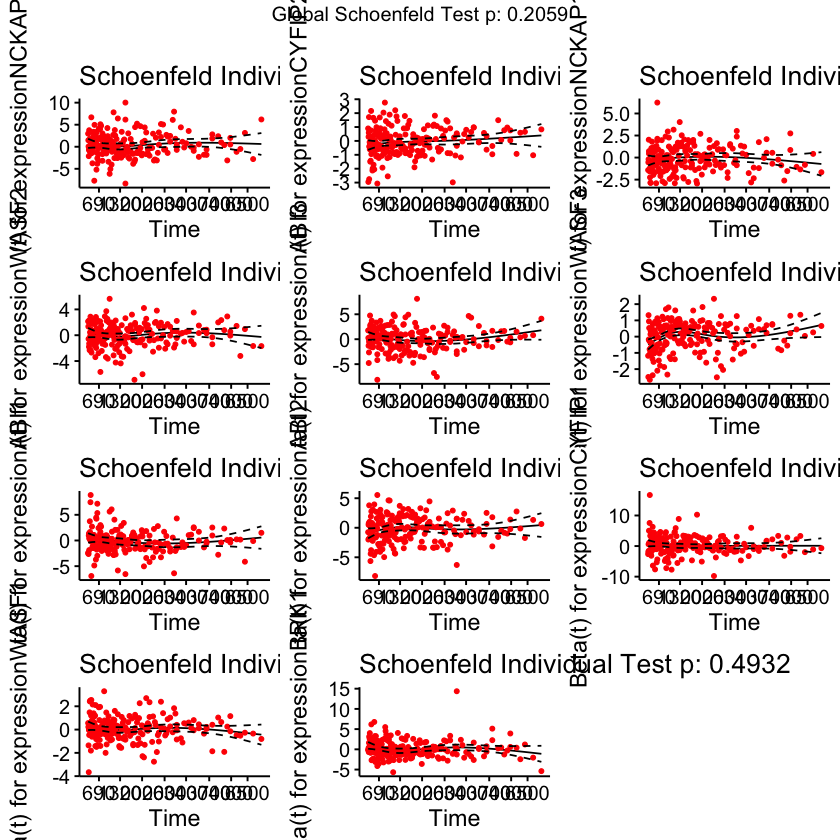

In [123]:
#ggcoxzph(test.ph) #it's supposed to be independant of time

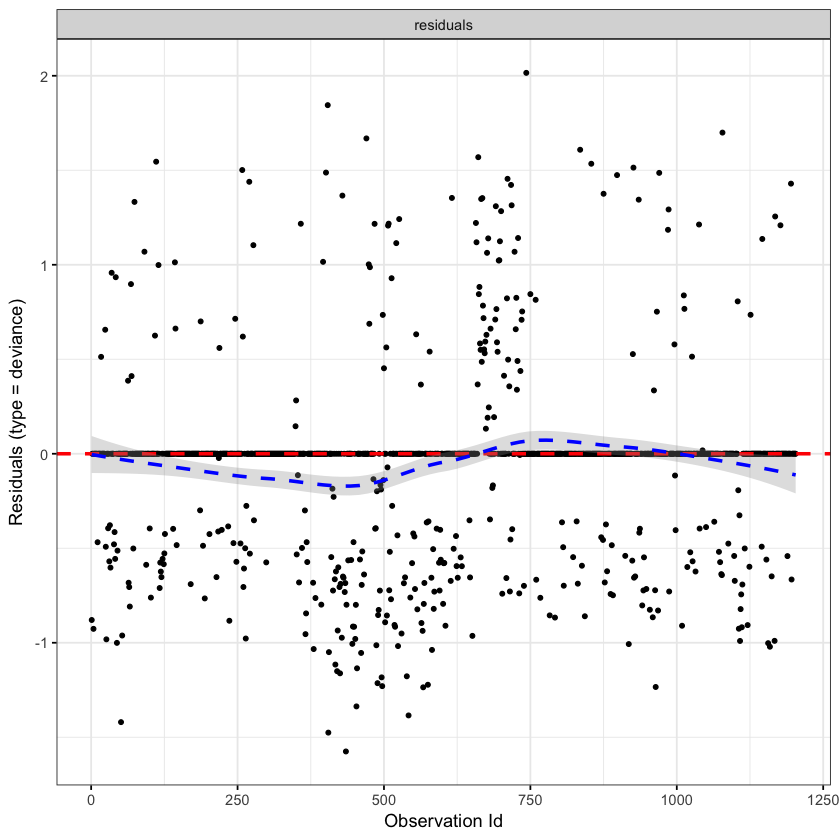

In [109]:
#ggcoxdiagnostics(res.cox2, type = "deviance",
                # linear.predictions = FALSE, ggtheme = theme_bw()) # another diagnosis (blue line should be horizontal)

Warning message:
“arguments formula is deprecated; will be removed in the next version; please use fit instead.”

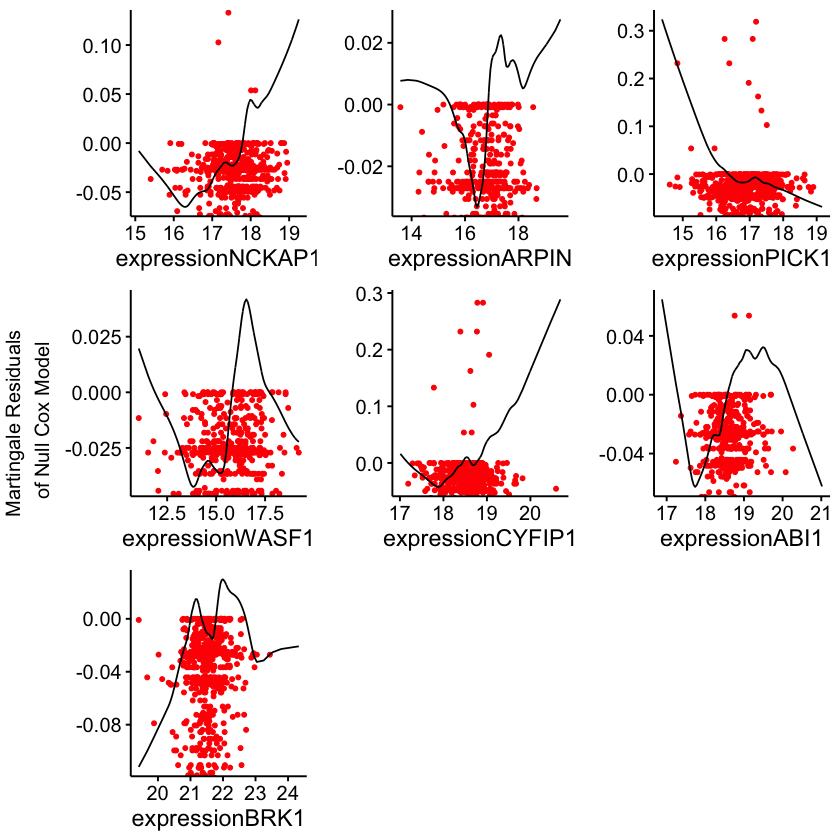

In [79]:
# test the linearity hypothesis (not sure how to interpret)
#ggcoxfunctional(Surv(survival, event) ~ expressionNCKAP1 + expressionARPIN + expressionPICK1 + expressionWASF1 + expressionCYFIP1 + expressionABI1 + expressionBRK1, fit=fit, data = df)

# Plot KM for the most significant parameter

##### Find the optimal cut-off for KM plot

In [155]:
#df.cut <- surv_cutpoint(
#   df,
#   time = "survival",
#   event = "event",
#   variables = c("expressionNCKAP1")
#)


In [161]:
#summary(df.cut)

cutpoint statistic
expressionNCKAP1 18.01    3.375964

In [162]:
#df.cat <- surv_categorize(df.cut) 

###### Make the KM plot

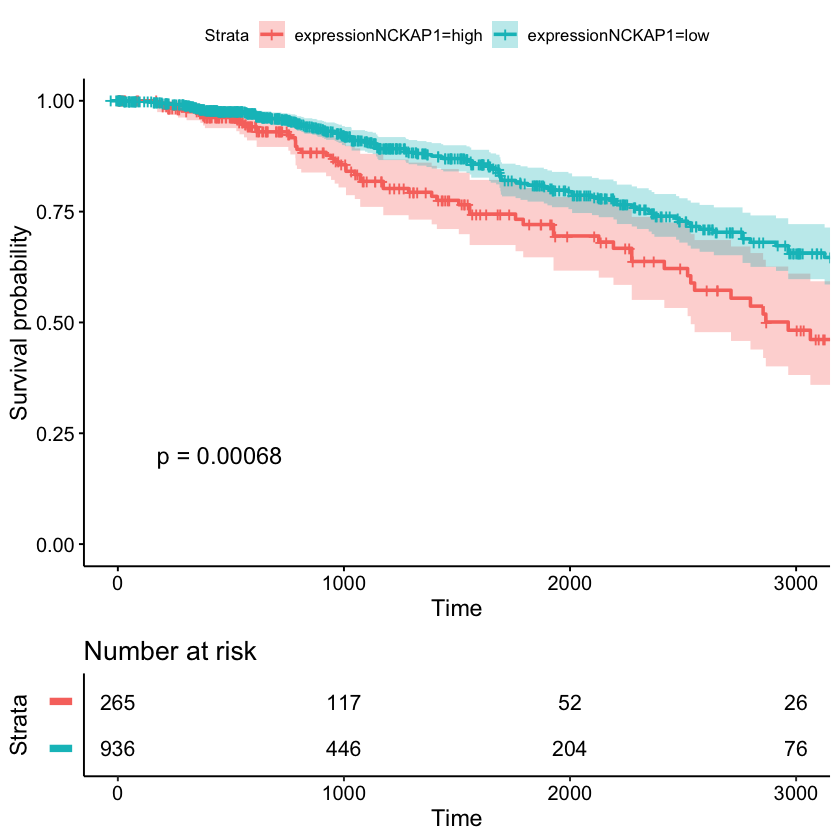

In [164]:
#fit <- survfit(Surv(survival, event) ~ expressionNCKAP1,
#               data = df.cat)
#ggsurvplot(
#   fit,                     # survfit object with calculated statistics.
#   risk.table = TRUE,       # show risk table.
#   pval = TRUE,             # show p-value of log-rank test.
#   conf.int = TRUE,         # show confidence intervals for 
                            # point estimaes of survival curves.
#   xlim = c(0,3000),        # present narrower X axis, but not affect
                            # survival estimates.
#   break.time.by = 1000,    # break X axis in time intervals by 500.
                             # customize plot and risk table with a theme.
# risk.table.y.text.col = T, # colour risk table text annotations.
#  risk.table.y.text = FALSE # show bars instead of names in text annotations
                            # in legend of risk table
#)